In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from fbprophet import Prophet


%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
plant1_generation = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
plant1_weather = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
plant2_generation = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
plant2_weather = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')

In [4]:
plant1_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
plant2_weather.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0
3258,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


# Questions
- Can we predict the power generation for next couple of days? - this allows for better grid management

We can try, I'm inclined to use fbprophet for this as we have weekly data

- Can we identify the need for panel cleaning/maintenance?
- Can we identify faulty or suboptimally performing equipment?

I feel like these two questions go together. The way to identify a need for maintenance or fault detection is to build a trend of normal system performance (power output) in a given set of environmental conditions (time of day, weather etc). Any fall in power output indicates a need for maintenance/cleaning or the occurance of a fault. As we only have a month of data, this will be challenging to do properly...but hey, we can show how it would be done

# Visualisation

Lets look at the data and see if anything can be gleaned from it

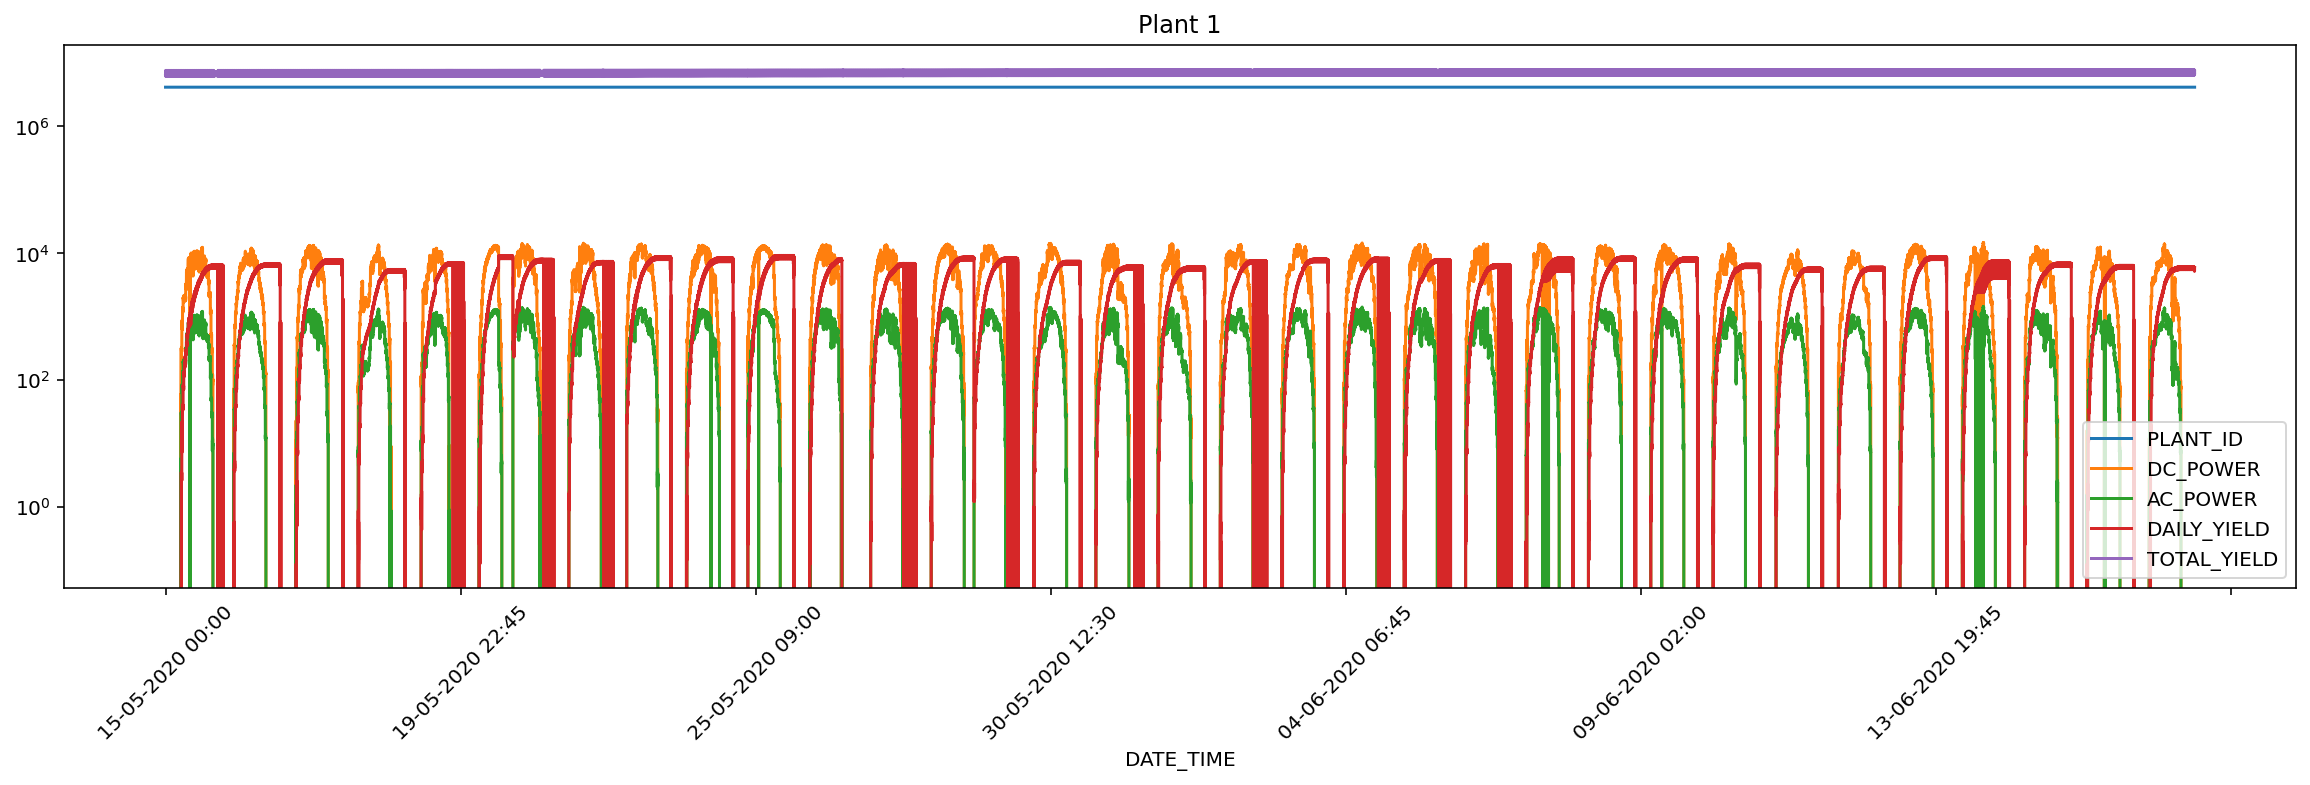

In [28]:
plant1_generation.plot(x = 'DATE_TIME', logy = True, figsize = (20, 5), title = 'Plant 1', rot = 45);

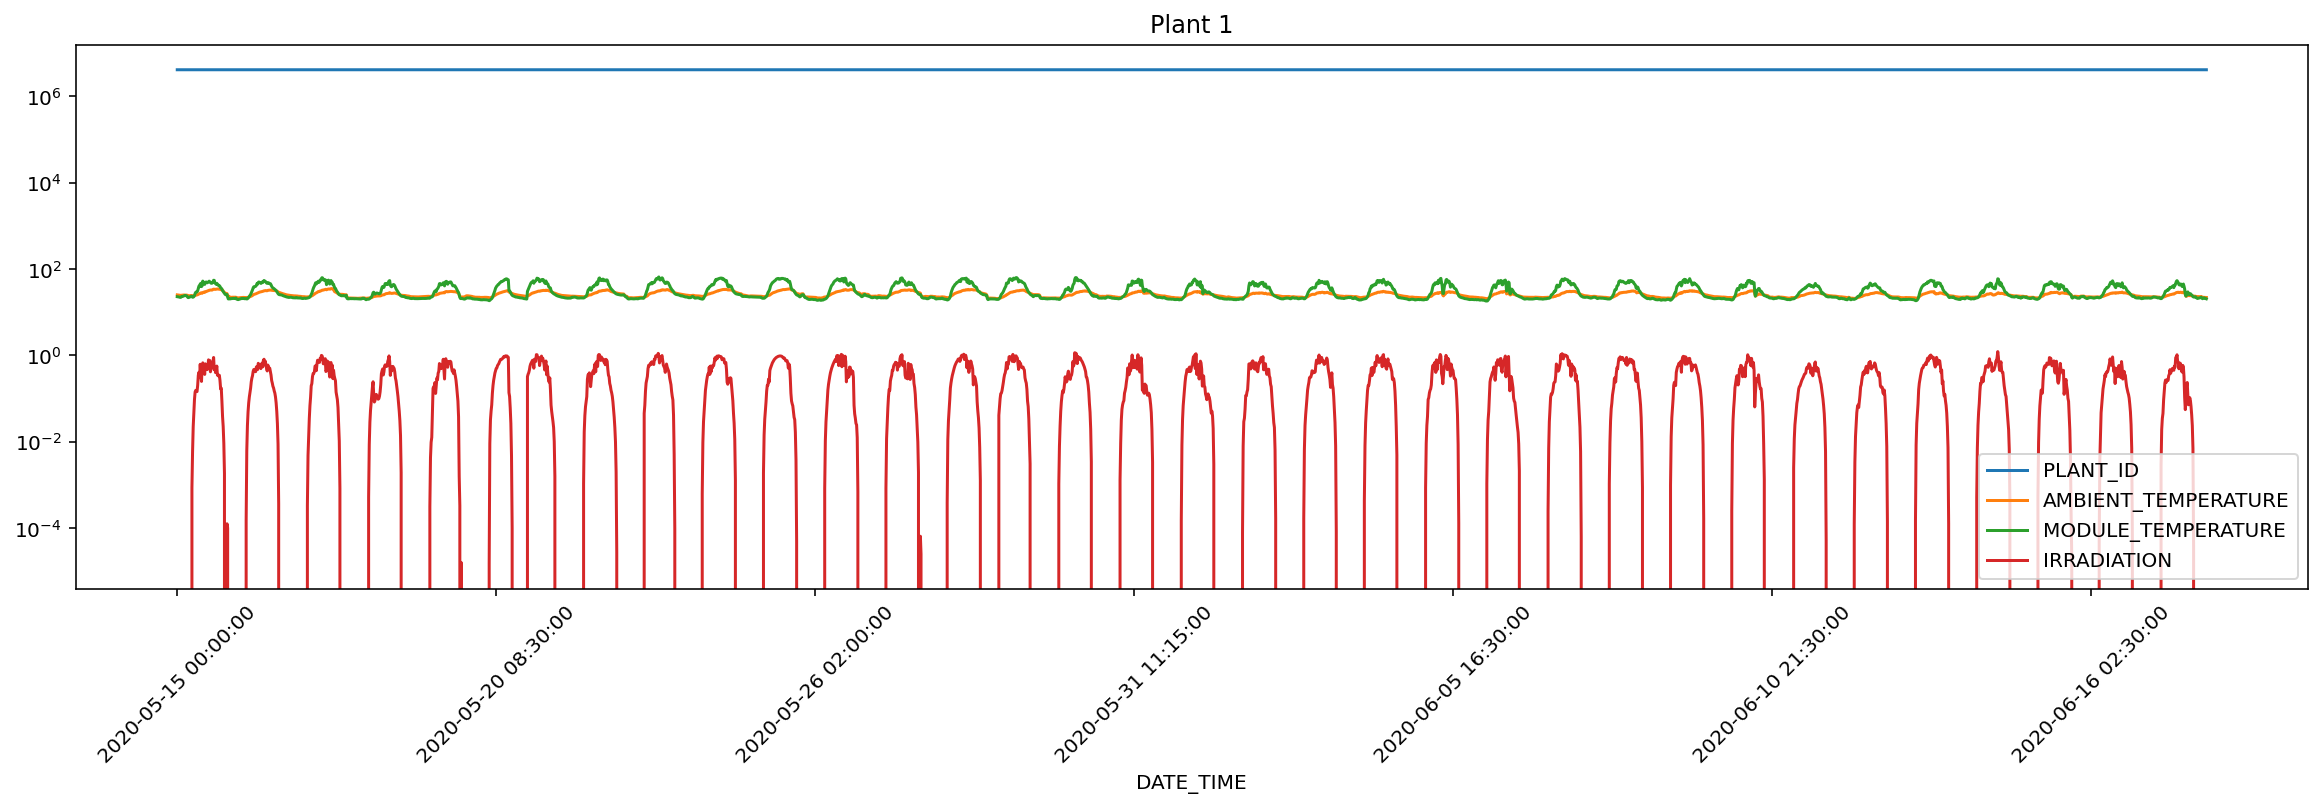

In [29]:
plant1_weather.plot(x = 'DATE_TIME', logy = True, figsize = (20, 5), title = 'Plant 1', rot = 45);

- From the plots above we see distinct peaks in power output, irradiation and temperature, rising and falling with the sun each day, at plant 1

#### Lets looks at some aggreate values comparing the two plants

In [40]:
power_metrics =  plant1_generation.columns[3:]
weather_metrics = plant1_weather.columns[3:]

In [43]:
print(power_metrics)
print(weather_metrics)

Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'], dtype='object')
Index(['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'], dtype='object')


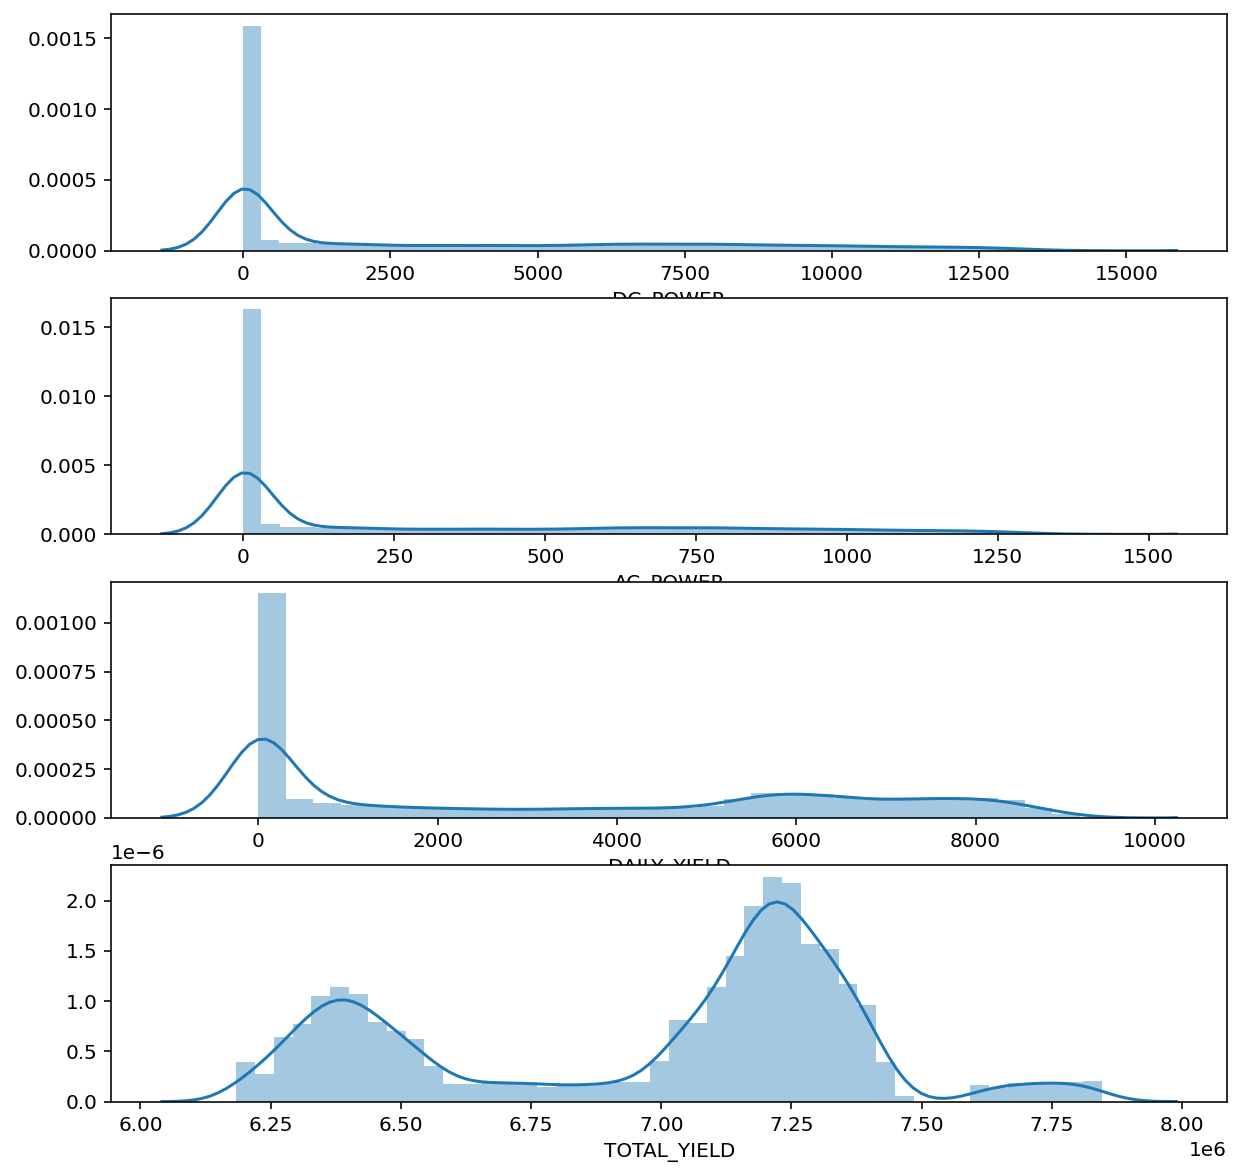

In [73]:
# Calculate a distribution for power output each day

fig, axes = plt.subplots(len(power_metrics), sharex=False, figsize=(10, 10))
fig.suptitle('Plant 1 Power Metrics', fontsize=16)
for i, j in enumerate(power_metrics):
    ax = sns.distplot(plant1_generation[j], ax=axes[i])
#     ax = d.plot.line(x='Date', y=cols, ax=axes[i], title=region)

In [ ]:
# Overlay of TOTAL_YIELD for plant 1 vs plant 2, with IRRADIATION for plant 1 vs plant 2 next to it


# Predicting Power Output With Facebook Prophet

# Anomaly Detection Using Gaussian Process